# Visualize Sentinel 2 image

In [1]:
# Import libraries
import datetime
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry  import box
import earthpy.plot as ep
import rioxarray as rxr
from rasterio.plot import plotting_extent

from sentinelhub import SHConfig, WcsRequest, MimeType, CRS, BBox

In [2]:
# SentinelHub configuration
config = SHConfig()
config.instance_id = 'e0d91a9e-9e07-4ba3-a274-4a261d555721' # Instance ID for AWS Europe endpoint
config.sh_client_id = '6b0f1254-59e8-4349-bcd3-6a56e3ea651e' # Credentials from the OAuth client
config.sh_client_secret = 'spD*%T/nPjY&/]45iXyYqEjvk_ulGn?PEHb/;};T'
config.save()

### Functions

In [3]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

### Import VMU vectors

In [4]:
# Open vector file
vmu_path = r"E:\McKinley\vectors\VMU_OSM_boundaries_NAD83_shifted_dissolved.shp"
vmu_polys = gpd.read_file(vmu_path)

# Reproject polys to WGS84
vmu_polys = vmu_polys.to_crs("EPSG:4326")

# Get the bounding box
AOI_coords_ndarray = vmu_polys.total_bounds.round(decimals=2)
AOI_coords = list(AOI_coords_ndarray)
AOI_bbox = BBox(bbox=AOI_coords, crs=CRS.WGS84)
#AOI_bbox

### Run WCS query

In [7]:
# Location of data folder
data_folder = r"E:\McKinley\sentinelhub_data"

# WCS query
wcs_true_color_request = WcsRequest(layer='BANDS-S2-L2A',
                                    bbox=AOI_bbox,
                                    time=('2021-01-01', '2021-04-07'),
                                    maxcc=0.2,
                                    resx='20m', resy='20m',
                                    data_folder=data_folder,
                                    image_format=MimeType.TIFF,
                                    config=config)

# Get the data as an np array
#wcs_true_color_img = wcs_true_color_request.get_data()

# Save the data to disk
#wcs_true_color_request.save_data()

dates = wcs_true_color_request.get_dates()

print(dates)

# Download list
downloads = wcs_true_color_request.get_filename_list()
#downloads

[datetime.datetime(2021, 1, 4, 18, 14, 16), datetime.datetime(2021, 1, 6, 18, 4, 18), datetime.datetime(2021, 1, 11, 18, 4, 20), datetime.datetime(2021, 1, 16, 18, 4, 16), datetime.datetime(2021, 1, 16, 18, 4, 22), datetime.datetime(2021, 2, 5, 18, 4, 18), datetime.datetime(2021, 2, 8, 18, 14, 15), datetime.datetime(2021, 2, 23, 18, 14, 15), datetime.datetime(2021, 3, 5, 18, 14, 15), datetime.datetime(2021, 3, 10, 18, 14, 15), datetime.datetime(2021, 3, 12, 18, 4, 19), datetime.datetime(2021, 3, 17, 18, 4, 19), datetime.datetime(2021, 3, 27, 18, 4, 19), datetime.datetime(2021, 3, 30, 18, 14, 14), datetime.datetime(2021, 4, 1, 18, 4, 15), datetime.datetime(2021, 4, 4, 18, 14, 12), datetime.datetime(2021, 4, 6, 18, 4, 17)]


### Open a single image

In [130]:
image = rxr.open_rasterio(data_folder + "/" + downloads[16])
#image

### Plot the result

Text(0.02, 0.02, 'Source: SentinelHub')

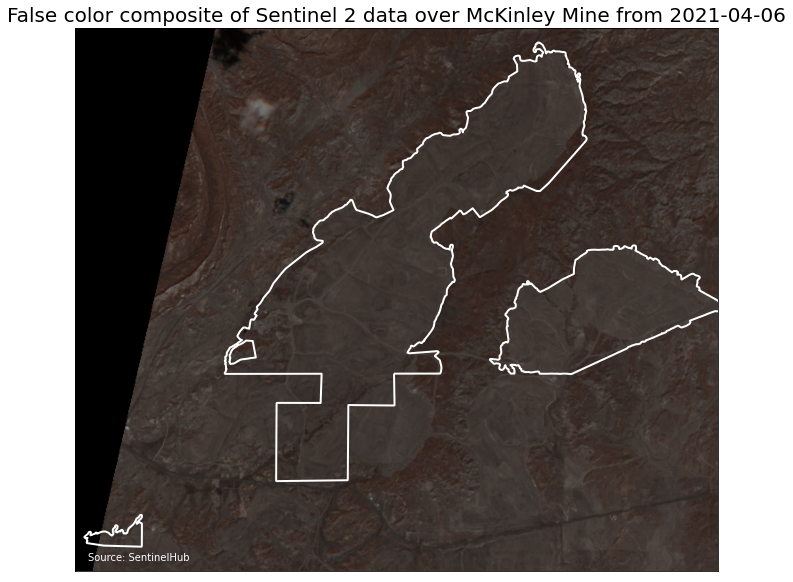

In [131]:
# Create plotting extent
image_extent = plotting_extent(image[0],
                               image.rio.transform())

# Setup figure with two sub-plots
fig, (ax) = plt.subplots(1, 1, figsize=(15, 10))

ep.plot_rgb(image.values,
            rgb=[8, 4, 3],
            extent=image_extent,
            ax=ax)

vmu_polys.plot(ax=ax,
               color='None',
               edgecolor='white',
               linewidth=2)

ax.set_title(
    "False color composite of Sentinel 2 data over McKinley Mine from 2021-04-06", fontsize=20)

ax.text(.02, .02, "Source: SentinelHub", transform=ax.transAxes, color="white")

In [129]:
for index, date in enumerate(wcs_true_color_request.get_dates()):
    print(' - image %d was taken on %s' % (index, date))

 - image 0 was taken on 2021-01-04 18:14:16
 - image 1 was taken on 2021-01-06 18:04:18
 - image 2 was taken on 2021-01-11 18:04:20
 - image 3 was taken on 2021-01-16 18:04:16
 - image 4 was taken on 2021-01-16 18:04:22
 - image 5 was taken on 2021-02-05 18:04:18
 - image 6 was taken on 2021-02-08 18:14:15
 - image 7 was taken on 2021-02-23 18:14:15
 - image 8 was taken on 2021-03-05 18:14:15
 - image 9 was taken on 2021-03-10 18:14:15
 - image 10 was taken on 2021-03-12 18:04:19
 - image 11 was taken on 2021-03-17 18:04:19
 - image 12 was taken on 2021-03-27 18:04:19
 - image 13 was taken on 2021-03-30 18:14:14
 - image 14 was taken on 2021-04-01 18:04:15
 - image 15 was taken on 2021-04-04 18:14:12
 - image 16 was taken on 2021-04-06 18:04:17
